<h1><b>FINAL PROJECT UJIAN AKHIR SEMESTER GENAP</b></h1>

<h2><b>Big Data And Predictive Analytics</b></h2>

<h5>Anggota Kelompok :</h5>
<ol>
    <li><p>Haikal Raditya Fadhilah (21.11.3910) </p></li>
    <li><p>Wulan Kristiyanti (21.11.3924) </p></li>
    <li><p>Widdia Glory Anggrenny (21.11.3936) </p></li>
    <li><p>Gilang Ramadhani (21.11.3946) </p></li>
</ol>


<h2><b>IMPORT LIBRARY</b></h2>

In [355]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split

<h2><b>IMPORT DATASET</b></h2>


In [356]:
df = pd.read_csv('./DATASET/CO2 Emissions_Canada.csv')

<h3><b>MEMPERSIAPKAN DATA</b></h3>
<p><b>1) Melihat Jumlah Baris Dan Column Dataset</b></p>

In [357]:
df.shape

(7385, 12)

<p><b>2) Melihat tipe data tiap kolom dari dataset</b></p>

In [358]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

<p><b>3 Melihat data kolom apakah ada yang terdapat data kosong (NA) dan menghitung serta membersihkan data NULL</b></p>

In [359]:
df.isna()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


<p><b>4 Melihat Jumlah Data Yang Kosong Atau NA</b></p>

In [360]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

<h3><b>EDA (Exploratory Data Analytics)</b></h3>
<p><b>1.Print DataFrame</b></p>

In [361]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


<p><b>2.Melihat 10 Data Teratas</b></p>

In [362]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


<p><b>3.Melihat 10 Data Terakhir</b></p>

In [363]:
df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7375,VOLVO,S90 T6 AWD,MID-SIZE,2.0,4,AS8,Z,11.3,7.5,9.6,29,223
7376,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4,AS8,Z,10.5,7.1,8.9,32,208
7377,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,11.0,7.4,9.4,30,219
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


<p><b>3.Melihat Nama-nama Column Dari Dataset</b></p>

In [364]:
df.columns  

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

<p><b>4.Melihat Informasi column dataset</b></p>

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

<p><b>5.Melihat deskripsi dari dataset</b></p>

In [366]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<p><b>6 Membersihkan Data Outliers</b></p>

In [367]:
#Membuat Fungsi Untuk Membersihkan Outliers
def clear_outliers (dataset,kolom):
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR;
    max_iqr = Q3 + 1.5 * IQR;
    return dataset.loc[(dataset[kolom] >= min_iqr) & (dataset[kolom] <= max_iqr)].reset_index(drop=True)

In [368]:
# Membersikan Outliers Kolom Fuel Consumption City (L/100 km)
df = clear_outliers(df,'Fuel Consumption City (L/100 km)')

In [369]:
# Membersikan Outliers Kolom Fuel Consumption Hwy (L/100 km)
df = clear_outliers(df,'Fuel Consumption Hwy (L/100 km)')

In [370]:
# Membersikan Outliers Kolom Fuel Consumption Comb (L/100 km)
df = clear_outliers(df,'Fuel Consumption Comb (L/100 km)')

In [371]:
# Membersikan Outliers Kolom Fuel Consumption Comb (mpg)
df = clear_outliers(df,'Fuel Consumption Comb (mpg)')

In [372]:
# Mengurutkan Data Berdasarkan Kolom C02 Emissions Secara Ascending Serta Mereset Index
df.sort_values('CO2 Emissions(g/km)',ascending=True,inplace=True)
df.reset_index(inplace=True,drop=True)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,MERCEDES-BENZ,GLA 250 4MATIC,SUV - SMALL,2.0,4,AS7,E,13.6,10.0,12.0,24,128
1,KIA,OPTIMA HYBRID,MID-SIZE,2.4,4,AS6,X,6.6,5.9,6.3,45,145
2,LINCOLN,MKZ HYBRID,MID-SIZE,2.0,4,AV,X,6.2,6.4,6.3,45,145
3,HYUNDAI,SONATA HYBRID,MID-SIZE,2.4,4,AS6,X,6.6,5.9,6.3,45,145
4,HYUNDAI,SONATA HYBRID LIMITED,MID-SIZE,2.4,4,AS6,X,6.6,5.9,6.3,45,145
...,...,...,...,...,...,...,...,...,...,...,...,...
6983,ROLLS-ROYCE,PHANTOM DROPHEAD COUPE,COMPACT,6.7,12,AS8,Z,20.7,12.9,17.2,16,404
6984,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,20.9,13.0,17.3,16,405
6985,FORD,GT,TWO-SEATER,3.5,6,AM7,Z,20.6,13.2,17.3,16,406
6986,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,21.3,12.8,17.5,16,407


<p><b>7 Melihat Deskripsi Data Setelah Di Bersihkan Dari Data Outliers</b></p>

In [373]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6988.000000,6988.000000,6988.000000,6988.000000,6988.000000,6988.000000,6988.000000
mean,3.106254,5.552662,12.349399,8.870421,10.783915,27.453349,248.991843
std,1.308250,1.770406,2.911990,1.815540,2.383062,6.001285,52.278055
min,0.900000,3.000000,6.200000,4.500000,6.300000,16.000000,128.000000
25%,2.000000,4.000000,10.100000,7.500000,9.000000,23.000000,209.000000
50%,3.000000,6.000000,12.000000,8.600000,10.500000,27.000000,244.000000
75%,3.600000,6.000000,14.300000,10.000000,12.400000,31.000000,284.000000
max,8.400000,12.000000,21.300000,14.000000,17.600000,45.000000,408.000000


<p><b>8 Melihat Korelasi Setiap Variabel</b></p>

In [374]:
df.corr()

/tmp/ipykernel_15015/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.926442,0.844804,0.766804,0.830888,-0.792541,0.854056
Cylinders,0.926442,1.000000,0.822533,0.729232,0.802957,-0.756637,0.835555
Fuel Consumption City (L/100 km),0.844804,0.822533,1.000000,0.933860,0.992294,-0.958631,0.933247
Fuel Consumption Hwy (L/100 km),0.766804,0.729232,0.933860,1.000000,0.970506,-0.940306,0.909434
Fuel Consumption Comb (L/100 km),0.830888,0.802957,0.992294,0.970506,1.000000,-0.967054,0.939334
Fuel Consumption Comb (mpg),-0.792541,-0.756637,-0.958631,-0.940306,-0.967054,1.000000,-0.930364
CO2 Emissions(g/km),0.854056,0.835555,0.933247,0.909434,0.939334,-0.930364,1.000000


<h3><b>VISUALIASI DATA</b></h3>


<p><b>1 Melihat Karbondioksida Mobil Terbesar Yang Di Hasilkan Dari Setiap Merek</b></p>

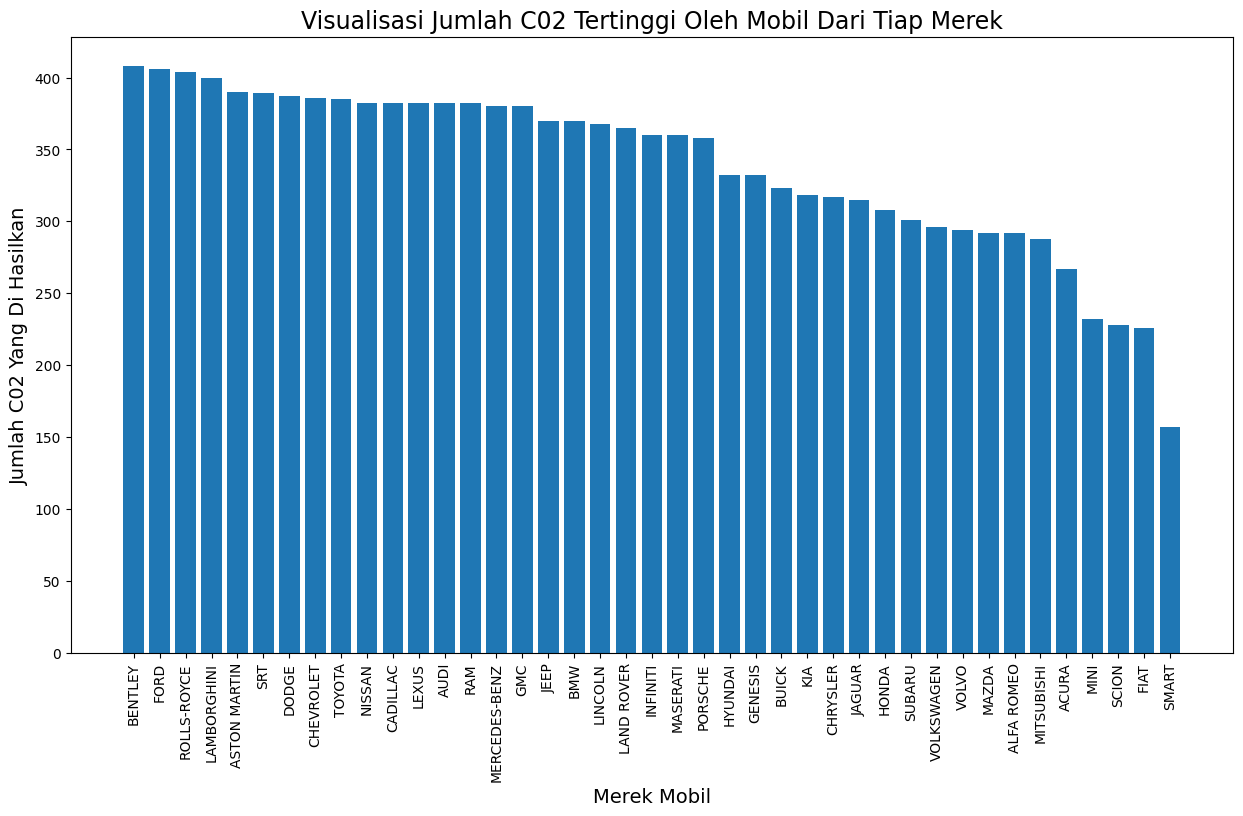

In [375]:
maxC02_per_merek = df.groupby('Make',as_index=False).max().sort_values('CO2 Emissions(g/km)',ascending=False)
fig = plt.subplots(figsize=(15,8))
plt.bar(maxC02_per_merek['Make'],maxC02_per_merek['CO2 Emissions(g/km)'])
plt.xticks(rotation=90)
plt.title("Visualisasi Jumlah C02 Tertinggi Oleh Mobil Dari Tiap Merek",fontsize=17)
plt.xlabel("Merek Mobil",fontsize=14)
plt.ylabel("Jumlah C02 Yang Di Hasilkan",fontsize=14)
plt.show()

<p><b>2 Memvisualisasikan Data C02 Emission Dengan Cylinders Menggunakan Linechart</b></p>

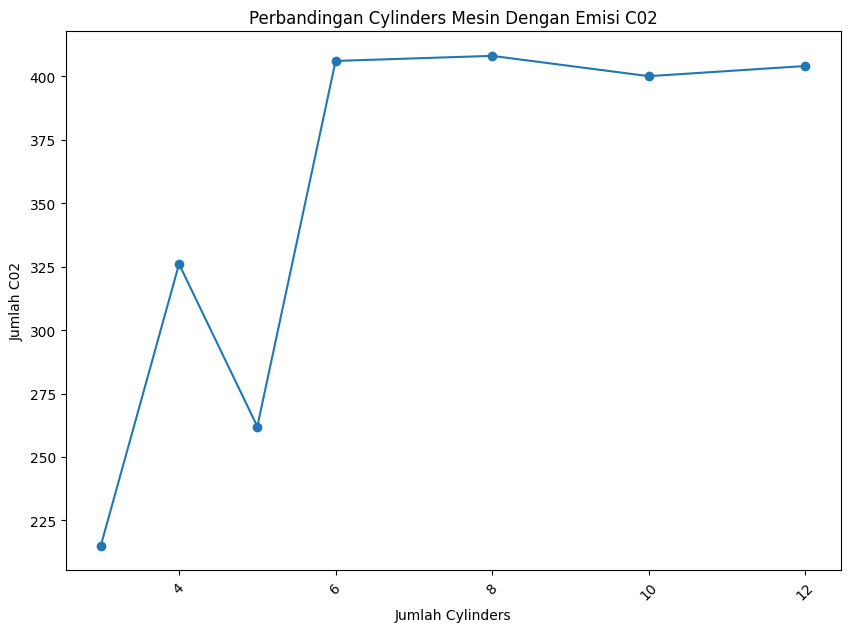

In [376]:
cylinders_max_C02 = df.groupby('Cylinders',as_index=False).max()
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(cylinders_max_C02['Cylinders'],cylinders_max_C02['CO2 Emissions(g/km)'],marker='o');
plt.xticks(rotation=45)
plt.ylabel("Jumlah C02")
plt.xlabel("Jumlah Cylinders")
plt.title("Perbandingan Cylinders Mesin Dengan Emisi C02")
plt.show()

<p><b>3 Memvisualisasi Jumlah Data Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)</b></p>

Text(0.5, 1.0, 'Grafik Histogram Kolom Fuel Consumption Comb (mpg)')

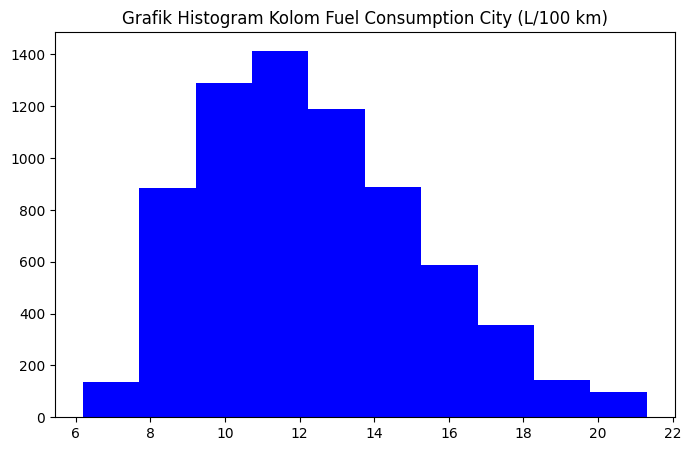

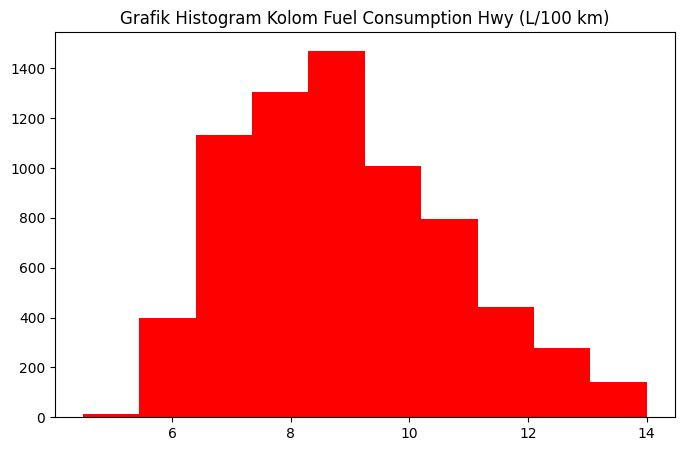

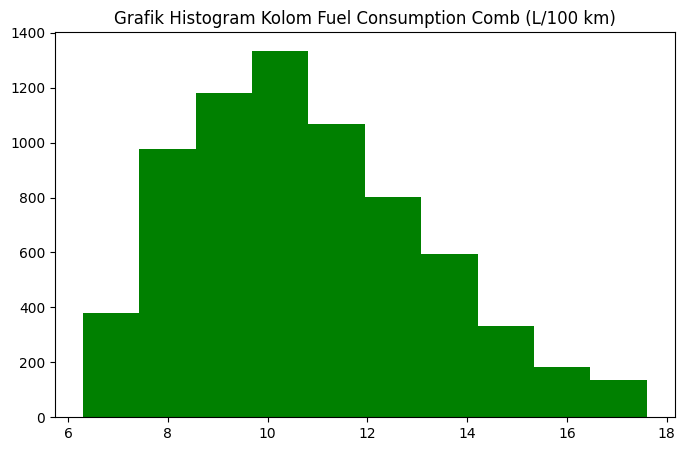

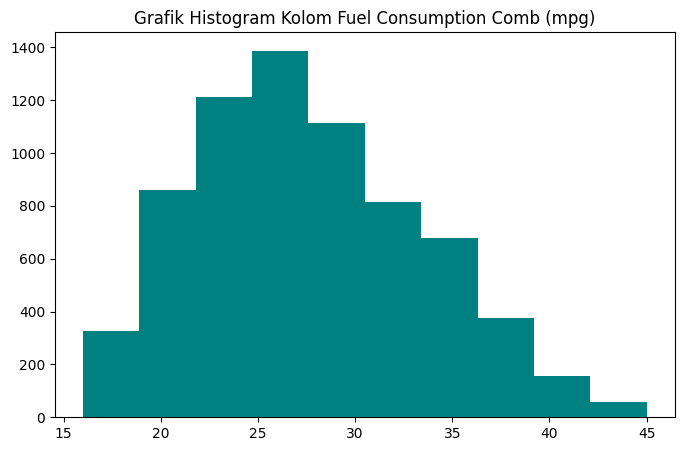

In [377]:
# Visualisasi Data Kolom Fuel Consumption City (L/100 km) Dengan Histogram
df.hist(column='Fuel Consumption City (L/100 km)',grid=False, figsize=(8,5),zorder=2,color="b")
plt.title("Grafik Histogram Kolom Fuel Consumption City (L/100 km)")
# Visualisasi Data Kolom Fuel Consumption Hwy (L/100 km) Dengan Histogram
df.hist(column='Fuel Consumption Hwy (L/100 km)',grid=False, figsize=(8,5),zorder=2,color="r")
plt.title("Grafik Histogram Kolom Fuel Consumption Hwy (L/100 km)")
# Visualisasi Data Kolom Fuel Consumption Comb (L/100 km) Dengan Histogram
df.hist(column='Fuel Consumption Comb (L/100 km)',grid=False, figsize=(8,5),zorder=2,color="g")
plt.title("Grafik Histogram Kolom Fuel Consumption Comb (L/100 km)")
# Visualisasi Data Kolom Fuel Consumption Comb (mpg) Dengan Histogram
df.hist(column='Fuel Consumption Comb (mpg)',grid=False, figsize=(8,5),zorder=2,color="teal")
plt.title("Grafik Histogram Kolom Fuel Consumption Comb (mpg)")

<p><b>5 Memvisualisasikan Data Kolom C02 Emission Dengan Fuel Consumption Comb (L/100 km) Dan C02 Emission Dengan Engine Size Serta Cylinders</b></p>

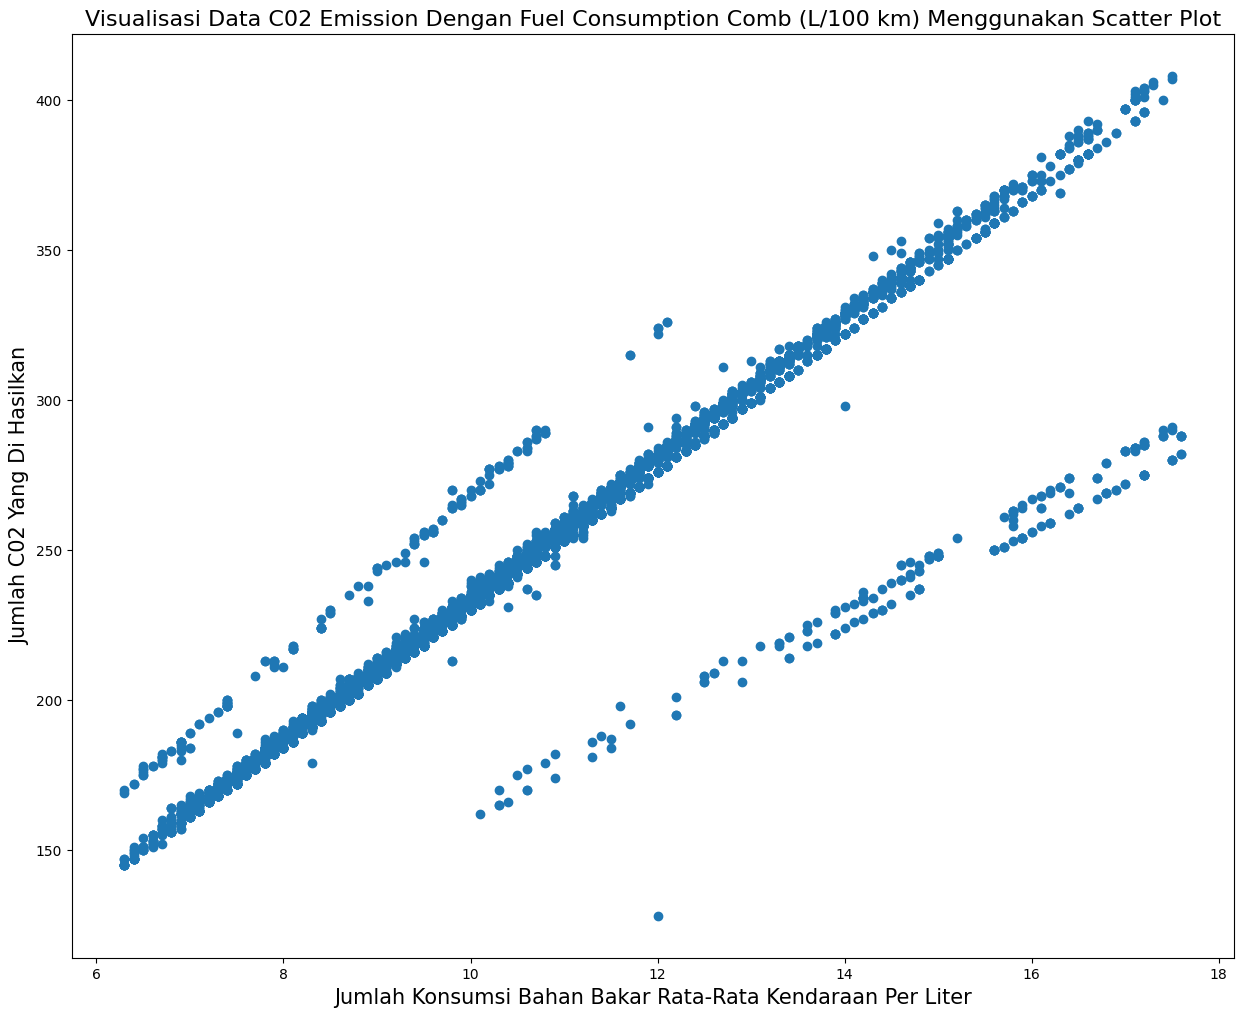

In [378]:
# Scatter Plot Kolom C02 Emission Dengan Fuel Consumption Comb (L/100 km)
fig,ax = plt.subplots(figsize=(15,12))
plt.scatter(df['Fuel Consumption Comb (L/100 km)'],df['CO2 Emissions(g/km)'])
plt.title("Visualisasi Data C02 Emission Dengan Fuel Consumption Comb (L/100 km) Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Jumlah Konsumsi Bahan Bakar Rata-Rata Kendaraan Per Liter", fontsize=15)
plt.ylabel("Jumlah C02 Yang Di Hasilkan",fontsize=15)
plt.show()

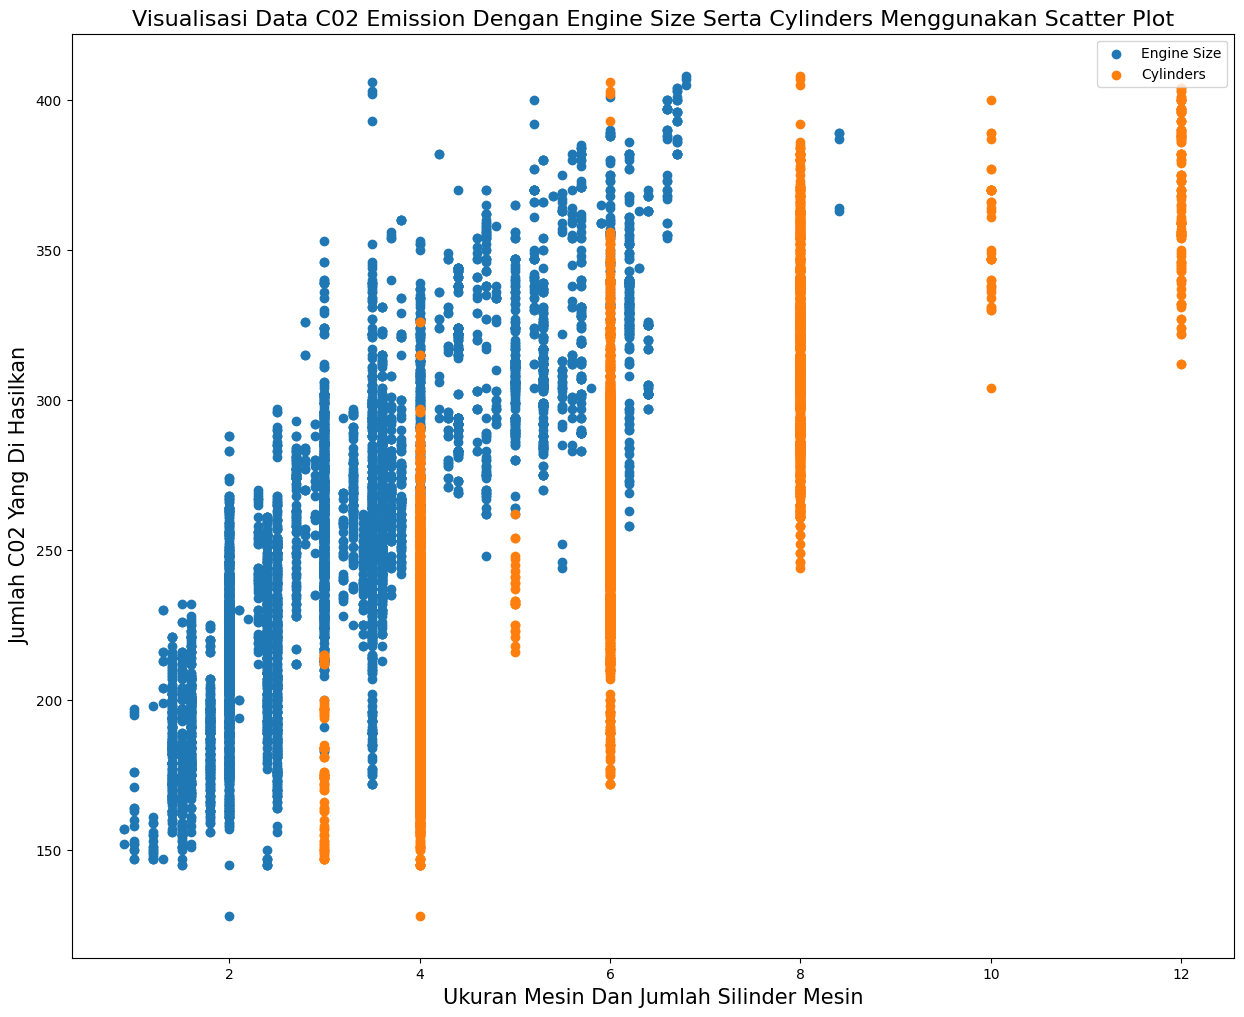

In [379]:
# Scatter Plot Kolom C02 Emission Dengan Engine Size Serta Cylinders
fig,ax = plt.subplots(figsize=(15,12))
plt.scatter(df['Engine Size(L)'],df['CO2 Emissions(g/km)'])
plt.scatter(df['Cylinders'],df['CO2 Emissions(g/km)'])
plt.title("Visualisasi Data C02 Emission Dengan Engine Size Serta Cylinders Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Ukuran Mesin Dan Jumlah Silinder Mesin", fontsize=15)
plt.ylabel("Jumlah C02 Yang Di Hasilkan",fontsize=15)
plt.legend(['Engine Size','Cylinders'])
plt.show()

<h3><b>KORELASI VARIABLE</b></h3>


<p><b>1.Melihat korelasi seluruh variabel</b></p>

In [380]:
df.corr()

/tmp/ipykernel_15015/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.926442,0.844804,0.766804,0.830888,-0.792541,0.854056
Cylinders,0.926442,1.000000,0.822533,0.729232,0.802957,-0.756637,0.835555
Fuel Consumption City (L/100 km),0.844804,0.822533,1.000000,0.933860,0.992294,-0.958631,0.933247
Fuel Consumption Hwy (L/100 km),0.766804,0.729232,0.933860,1.000000,0.970506,-0.940306,0.909434
Fuel Consumption Comb (L/100 km),0.830888,0.802957,0.992294,0.970506,1.000000,-0.967054,0.939334
Fuel Consumption Comb (mpg),-0.792541,-0.756637,-0.958631,-0.940306,-0.967054,1.000000,-0.930364
CO2 Emissions(g/km),0.854056,0.835555,0.933247,0.909434,0.939334,-0.930364,1.000000


<p><b>2.Memvisualisasikan Korelasi Semua Variabel Dengan Heatmap</b></p>

/tmp/ipykernel_15015/2187882668.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = df.corr()


<Axes: title={'center': 'Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap'}>

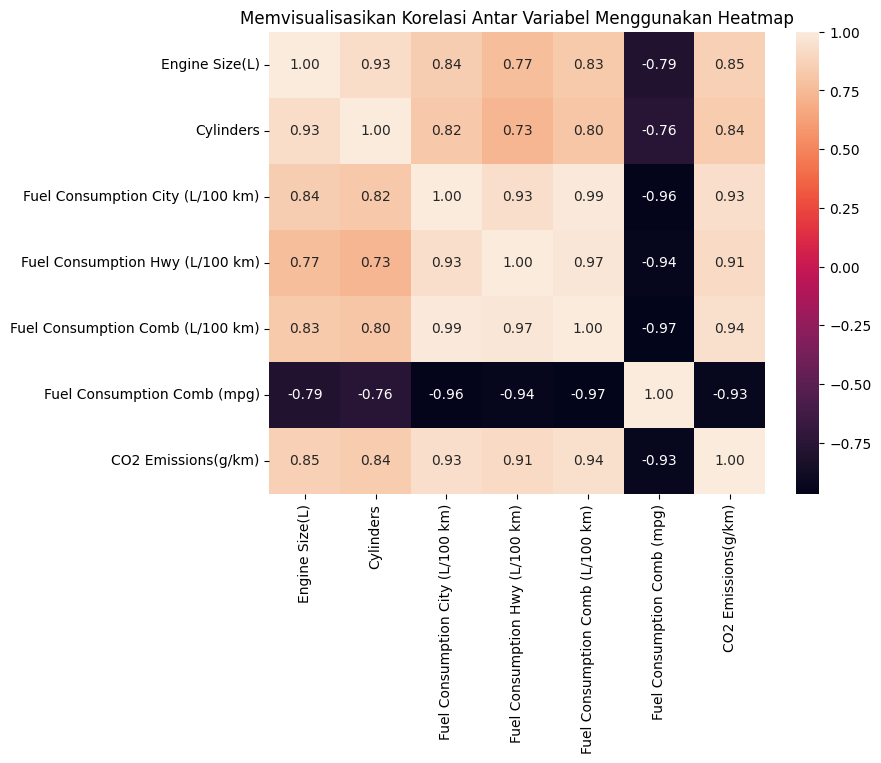

In [381]:
plt.figure(figsize=(8,6))
korelasi = df.corr()
plt.title("Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap")
sns.heatmap(korelasi,annot=True,fmt='.2f')

<p><b>3.Membuat Fungsi Untuk Mengecek Korelasi 1 Variabel Dengan Variabel Lainnya</b></p>

In [382]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [383]:
def cek_korelasi(dataset=df,kolomDependen='CO2 Emissions(g/km)',arrKolomIndependent=['Engine Size(L)', 'Cylinders',
       'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)',]):
    for data in arrKolomIndependent:
        pearson_corr,p_value = stats.pearsonr(dataset[kolomDependen],dataset[data])
        
        if data == kolomDependen:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Memiliki Korelasi Pearson Sempurna Di Karenakan Kedua Kolom Sama!")
            print("")
        elif pearson_corr > 0.7:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr > 0.5:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr > 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr == 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Tidak Memilik Korelasi Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < -0.7:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Kuat Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < -0.5:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Sedang Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")

<p><b>4.Mengecek Korelasi Kolom 'C02 Emissions' dengan Semua Kolom Numeric</b></p>

In [384]:
cek_korelasi(kolomDependen='CO2 Emissions(g/km)')

Dataset Kolom 'CO2 Emissions(g/km)' Dan 'Engine Size(L)' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.8540564984003578

Dataset Kolom 'CO2 Emissions(g/km)' Dan 'Cylinders' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.8355545081017096

Dataset Kolom 'CO2 Emissions(g/km)' Dan 'Fuel Consumption City (L/100 km)' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.9332467579756795

Dataset Kolom 'CO2 Emissions(g/km)' Dan 'Fuel Consumption Hwy (L/100 km)' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.909433640624198

Dataset Kolom 'CO2 Emissions(g/km)' Dan 'Fuel Consumption Comb (L/100 km)' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.9393339672156097

Dataset Kolom 'CO2 Emissions(g/km)' Dan 'Fuel Consumption Comb (mpg)' Berkorelasi Negatif Kuat Dengan Nilai Korelasi Pearson : -0.9303644465314531



<p><b>5.Mengecek Korelasi Kolom 'Fuel Consumption Comb (L/100 km)' dengan Kolom Engine Size Dan Cylinders</b></p>

In [385]:
cek_korelasi(kolomDependen='Fuel Consumption Comb (L/100 km)',arrKolomIndependent=['Engine Size(L)','Cylinders'])

Dataset Kolom 'Fuel Consumption Comb (L/100 km)' Dan 'Engine Size(L)' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.8308883872989032

Dataset Kolom 'Fuel Consumption Comb (L/100 km)' Dan 'Cylinders' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.8029570802135059



<h3><b>REGRESI</b></h3>

<h4><b>LINEAR REGRESI DENGAN 1 VARIABEL BEBAS</b></h4>

<p><b>1.Mempersiapkan data (Mendeklarasikan Variabel Bebas dan Variabel Terikat)</b></p>

In [386]:
X = df[['Fuel Consumption Comb (L/100 km)']] #Mendeklarasikan Variabel X sebagai variabel bebas (Konsumsi Bahan Bakar Rata2 Kendaraan Sejauh 100km)
y = df['CO2 Emissions(g/km)'] #Mendeklarasikan Variabel y sebagai variabel terikat (Emisi Gas Karbon Dioksida)

<p><b>2.Membagi Data Menjadi 2 Yaitu Data Train dan Data Test</b></p>

In [387]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=110);

<p><b>3.Melihat Jumlah Data Train Dan Test</b></p>

In [388]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (5241, 1)
Jumlah Data X Test :  (1747, 1)
Jumlah Data y Train :  (5241,)
Jumlah Data y Test :  (1747,)


<p><b>4.Membuat Model Linear Regresi</b></p>

In [389]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Menampikan Nilai Koefisien Dan Intercept</b></p>

In [390]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [20.62718779]
Nilai Intercept :  26.60625137646707


<p><b>6.Memvisualisasi Linear Regresi Dengan Scatter Plot</b></p>

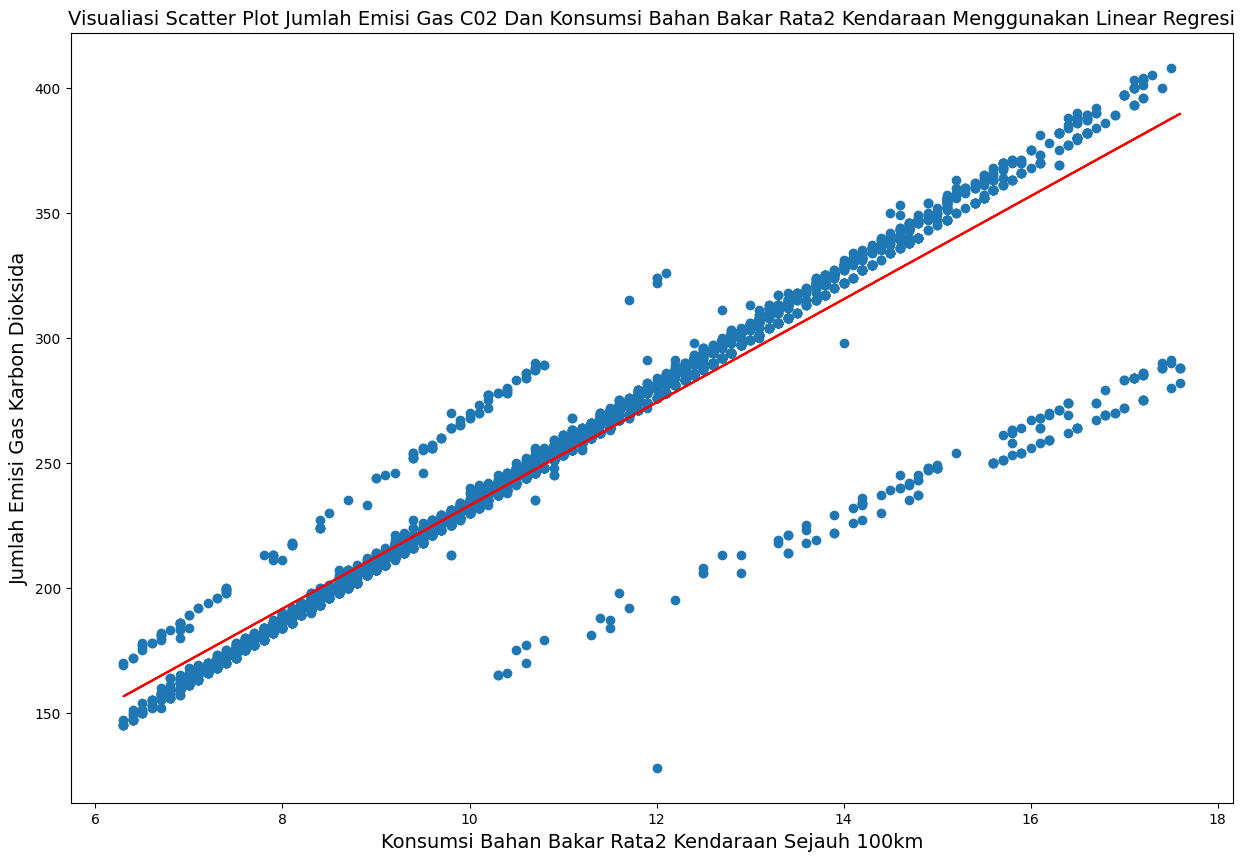

In [391]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train,y_train)
ax.plot(X_train, linreg_model.coef_*X_train + linreg_model.intercept_, '-r')
plt.title("Visualiasi Scatter Plot Jumlah Emisi Gas C02 Dan Konsumsi Bahan Bakar Rata2 Kendaraan Menggunakan Linear Regresi",fontsize="14")
plt.xlabel("Konsumsi Bahan Bakar Rata2 Kendaraan Sejauh 100km",fontsize="14")
plt.ylabel("Jumlah Emisi Gas Karbon Dioksida",fontsize="14")
plt.show()

<p><b>7.Melakukan Prediksi Dari Model</b></p>

In [392]:
y_pred = linreg_model.predict(X_test)

print("Data Harga Hasil Prediksi :",y_pred[0:10])
print("")
print("Data Harga Asli :",y_test[0:10])

Data Harga Hasil Prediksi : [369.01756873 317.44959925 290.63425512 239.06628564 201.93734761
 267.94434855 206.06278517 313.32416169 228.75269174 214.31366029]

Data Harga Asli : 6934    387
6420    329
5741    299
3152    237
2846    230
4935    276
1560    205
6331    324
2583    225
1987    214
Name: CO2 Emissions(g/km), dtype: int64


<p><b>8.Evaluasi Model</b></p>

In [393]:
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  18.81158402185771
Mean Absolute Error (MAE):  9.114851353897137
Mean Squared Error (MSE):  353.87569341141227


<h4><b>LINEAR REGRESI DENGAN 2 VARIABEL BEBAS</b></h4>

<p><b>1.Mempersiapkan data (Mendeklarasikan Variabel Bebas dan Variabel Terikat)</b></p>

In [394]:
variabelBebas = ['Engine Size(L)','Cylinders'] # Menggunakan Variabel Ukuran Mesin Dan Jumlah Silinder Untuk Variabel Bebas
X = df[variabelBebas]
y = df['CO2 Emissions(g/km)']

<p><b>2.Membagi Data Menjadi 2 Yaitu Data Train dan Data Test</b></p>

In [395]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=100);

<p><b>3.Melihat Jumlah Data Train Dan Test</b></p>

In [396]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (4891, 2)
Jumlah Data X Test :  (2097, 2)
Jumlah Data y Train :  (4891,)
Jumlah Data y Test :  (2097,)


<p><b>4.Membuat Model Linear Regresi</b></p>

In [397]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Menampikan Nilai Koefisien Dan Intercept</b></p>

In [398]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [22.81538852  8.98836766]
Nilai Intercept :  128.00330468390953


<p><b>6.Memvisualisasi Linear Regresi Dengan Scatter Plot</b></p>

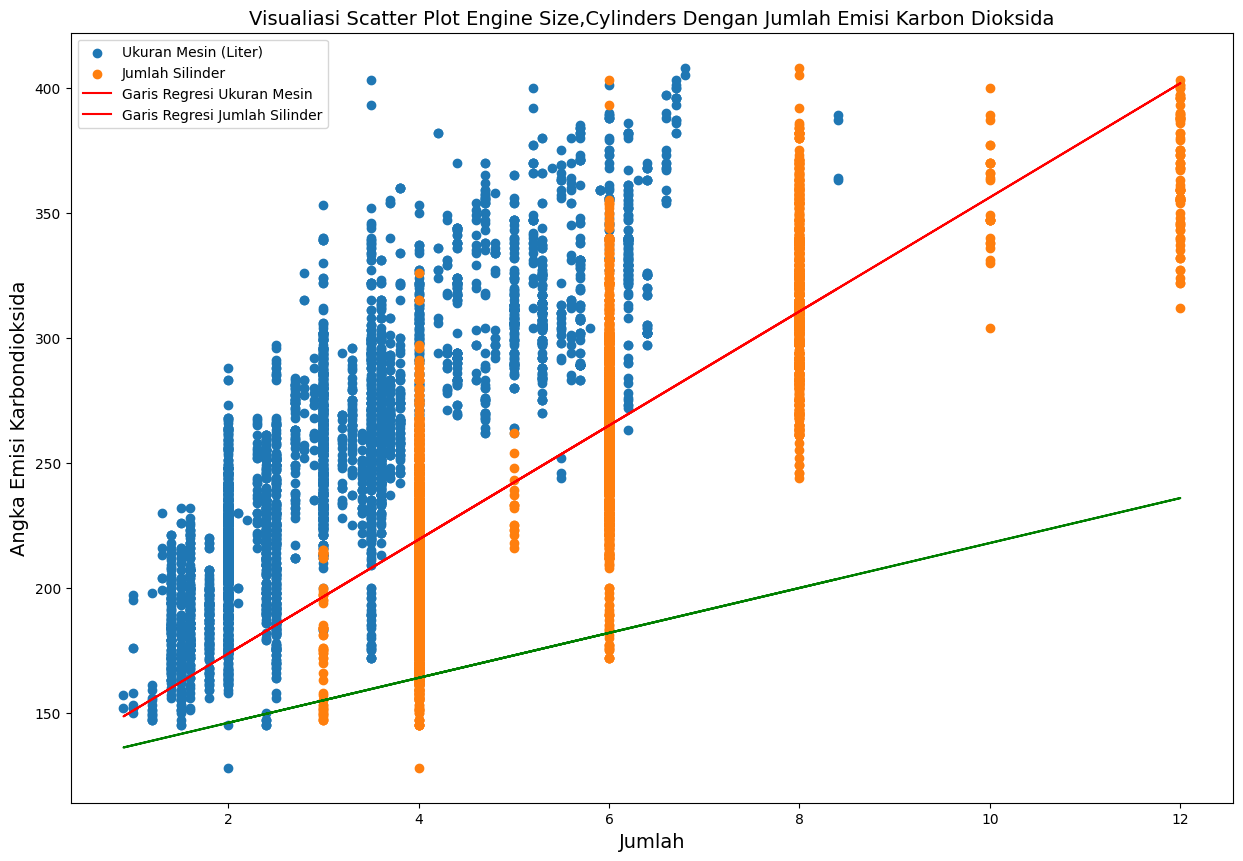

In [399]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train[variabelBebas[0]],y_train)
plt.scatter(X_train[variabelBebas[1]],y_train)
ax.plot(X_train, linreg_model.coef_[0]*X_train + linreg_model.intercept_, '-r')
ax.plot(X_train, linreg_model.coef_[1]*X_train + linreg_model.intercept_, '-g')
plt.title("Visualiasi Scatter Plot Engine Size,Cylinders Dengan Jumlah Emisi Karbon Dioksida",fontsize="14")
plt.ylabel("Angka Emisi Karbondioksida",fontsize="14")
plt.xlabel("Jumlah",fontsize="14")
plt.legend(['Ukuran Mesin (Liter)','Jumlah Silinder','Garis Regresi Ukuran Mesin','Garis Regresi Jumlah Silinder'])
plt.show()

<p><b>7.Melakukan Prediksi Dari Model</b></p>

In [400]:
y_pred = linreg_model.predict(X_test)

print("Data Harga Hasil Prediksi :",y_pred[0:5])
print("")
print("Data Harga Asli :",y_test[0:5])

Data Harga Hasil Prediksi : [209.58755234 388.72681962 313.98718852 205.02447464 300.29795541]

Data Harga Asli : 1268    198
6923    382
5861    303
368     175
4670    269
Name: CO2 Emissions(g/km), dtype: int64


<p><b>8.Evaluasi Model</b></p>

In [401]:
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  26.55546311307109
Mean Absolute Error (MAE):  20.86948376855168
Mean Squared Error (MSE):  705.1926211496794


<h4><b>LINEAR REGRESI DENGAN 5 VARIABEL BEBAS</b></h4>

<p><b>1.Mempersiapkan data (Mendeklarasikan Variabel Bebas dan Variabel Terikat)</b></p>

In [402]:
variabelBebas = ['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']
X = df[variabelBebas]
y = df['CO2 Emissions(g/km)']

<p><b>2.Membagi Data Menjadi 2 Yaitu Data Train dan Data Test</b></p>

In [403]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=100);

<p><b>3.Melihat Jumlah Data Train Dan Test</b></p>

In [404]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (4891, 5)
Jumlah Data X Test :  (2097, 5)
Jumlah Data y Train :  (4891,)
Jumlah Data y Test :  (2097,)


<p><b>4.Membuat Model Linear Regresi</b></p>

In [405]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Menampikan Nilai Koefisien Dan Intercept</b></p>

In [406]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [ 4.95083014  4.74196803  0.07750876  6.05575548 10.98229415]
Nilai Intercept :  34.18025263070868


<p><b>6.Memvisualisasi Linear Regresi Dengan Scatter Plot</b></p>

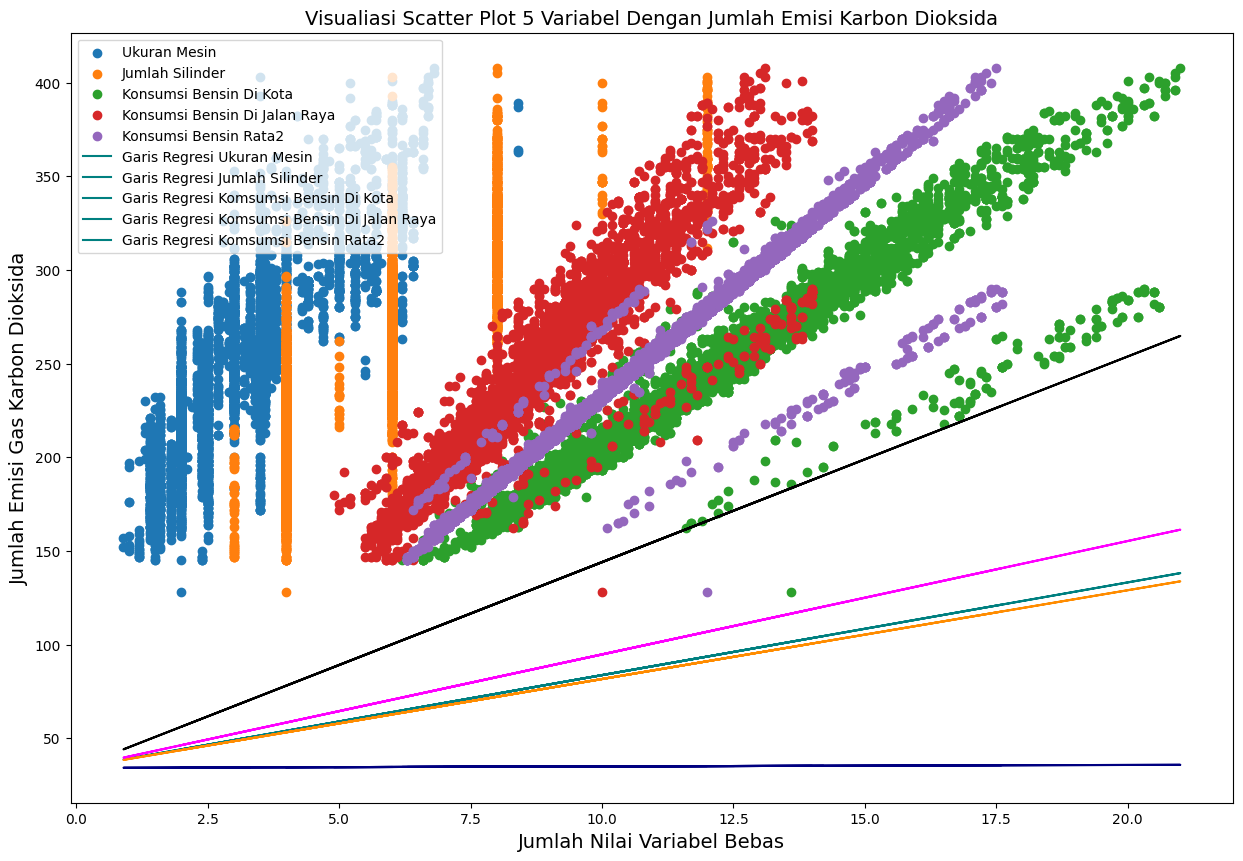

In [407]:
['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train[variabelBebas[0]],y_train)
plt.scatter(X_train[variabelBebas[1]],y_train)
plt.scatter(X_train[variabelBebas[2]],y_train)
plt.scatter(X_train[variabelBebas[3]],y_train)
plt.scatter(X_train[variabelBebas[4]],y_train)
ax.plot(X_train, linreg_model.coef_[0]*X_train + linreg_model.intercept_, 'teal')
ax.plot(X_train, linreg_model.coef_[1]*X_train + linreg_model.intercept_, 'darkorange')
ax.plot(X_train, linreg_model.coef_[2]*X_train + linreg_model.intercept_, 'navy')
ax.plot(X_train, linreg_model.coef_[3]*X_train + linreg_model.intercept_, 'fuchsia')
ax.plot(X_train, linreg_model.coef_[4]*X_train + linreg_model.intercept_, 'black')
plt.title("Visualiasi Scatter Plot 5 Variabel Dengan Jumlah Emisi Karbon Dioksida",fontsize="14")
plt.xlabel("Jumlah Nilai Variabel Bebas",fontsize="14")
plt.ylabel("Jumlah Emisi Gas Karbon Dioksida",fontsize="14")
plt.legend(['Ukuran Mesin','Jumlah Silinder','Konsumsi Bensin Di Kota','Konsumsi Bensin Di Jalan Raya','Konsumsi Bensin Rata2','Garis Regresi Ukuran Mesin','Garis Regresi Jumlah Silinder','Garis Regresi Komsumsi Bensin Di Kota','Garis Regresi Komsumsi Bensin Di Jalan Raya','Garis Regresi Komsumsi Bensin Rata2'])
plt.show()

<p><b>7.Melakukan Prediksi Dari Model</b></p>

In [408]:
y_pred = linreg_model.predict(X_test)

print("Data Harga Hasil Prediksi :",y_pred[0:5])
print("")
print("Data Harga Asli :",y_test[0:5])

Data Harga Hasil Prediksi : [199.63107773 376.2739155  297.88613143 183.14724009 276.93984918]

Data Harga Asli : 1268    198
6923    382
5861    303
368     175
4670    269
Name: CO2 Emissions(g/km), dtype: int64


<p><b>8.Evaluasi Model</b></p>

In [409]:
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  16.345370226102396
Mean Absolute Error (MAE):  9.402089786842936
Mean Squared Error (MSE):  267.1711278283547
